# TRPL Curve Fitting
### Multi-Exponential
***
This Program will import TRPL decay data, convert the information into data with applicable units, and fit the decay curve.

For fitting these decays, it is useful to plot the data scaled by the natual log, and then use a simple linear curve fit to simplify the process. Multi-Exponential decays will need to be fit with a piecewise line corresponding to each decay.

In [1]:
#Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from scipy.optimize import curve_fit
import math

### Importing the data file
***
We will utilize pandas to read in the txt files of our data.

fileName will be the location of your data file as well as the name, and it will be important to specify the exact file location in order to import the right data.

Once imported and saved to a dataframe, the data will be converted to appropriate units:
- The x-axis will be changed from channels to nanoseconds.
- The y-axis will be scaled logarythmically.

In [2]:
#Importing the Data from text file
df = []
#Put File Name here:
fileName = 'SILAR8_510ex_530fil_644mono.txt'
#Path goes here
path = ''
data = pd.read_csv(path+fileName, header=5, sep='\t')

#Saving the data as lists, in correct units.
x = data['Chan'] * (5.486969*10**-2) #Converting x values from bins to ns
logy = np.log(data['Data'])
for i in logy:
    if math.isnan(i):
        i = 0
y = data['Data']
print('Read in file:', fileName)

Read in file: SILAR8_510ex_530fil_644mono.txt


C:\Users\evanf\anaconda3\envs\general_sci\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
def plot(x, y, title):
    """Takes x and y values and plots them with the proper customization to the plots"""
    
    #Setting the axes and plotting data
    plt.rcParams['figure.figsize'] = [10,8]
    plt.scatter( x, y, c='black', s=4)

    #Plot Customization
    plt.title(title)
    plt.xlabel('time (ns)')
    plt.ylabel('photon counts')

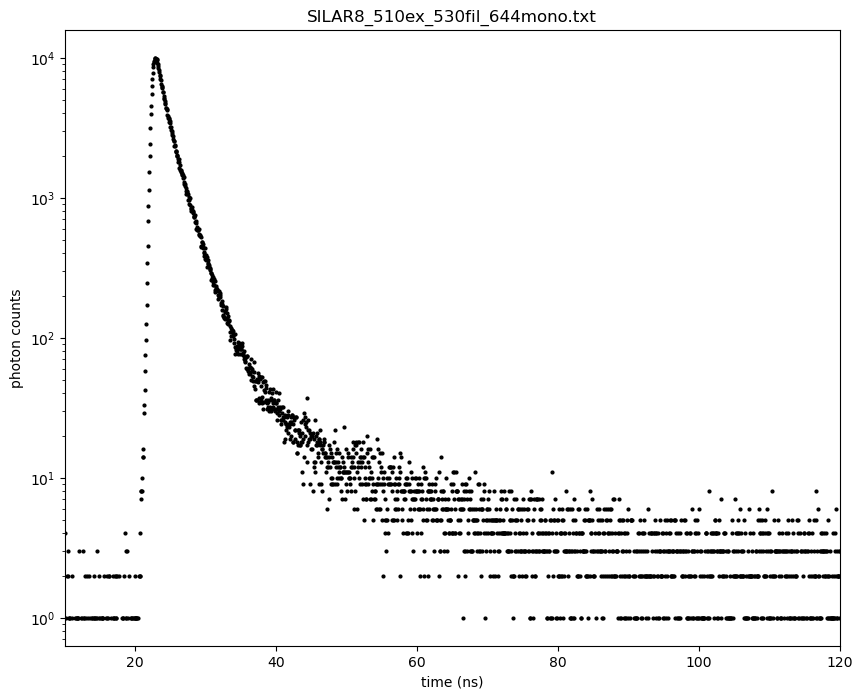

In [4]:
#Plotting the Scatter Plot
plot(x,y, fileName)
plt.yscale('log')
plt.xlim(10,120)
#Saves the file as a png image
#plt.savefig(fileName + '.png')
plt.show()

In [5]:
#Future markdown

***
### Finding Multi-Decay Lifetimes

This portion of the code specifically details the fitting process for a double or multi-exponential decay.

This cell defines a piecewise function, with a slope and intercept for each decay. This particular definition makes a function with two distinct decays.

If more decays are present in the graph when plotted, you can add another linear slope to the piecewise function with its respective variables. For example, if I wanted to do a fit for three decays, I would add this line of code below two's definition:
- three = f*x + g
    

Cropping list to the range of the data:

In [6]:
#Finding the maximum value as well as the index this is at
maxval = max(logy)
print(f'The max of the data is {maxval:.2f}, which is {np.exp(maxval):.0f} photon counts.')
y2 = logy.tolist()

maxindex = y2.index(maxval)
t0 = x[maxindex]

#figuring out where to terminate the fitting region
#get the maximum background value - the first 10-ish nanoseconds, before the excitation
#pulse hits
background = np.max(y[0:200]) + 1

#find the first time the data dips below this after the peak
stop = list((y//background)).index(0, maxindex)

#Making lists for the line we are fitting
x2 = data['Chan'].tolist()
fitx = np.array([i*(5.486969*10**-2) for i in range(0, stop-maxindex)])
fity = np.array(logy[maxindex:stop])

The max of the data is 9.21, which is 10001 photon counts.


In [7]:
def twolines(x, a, b, c, d):
    one = a*x + b
    two = c*x + d
    return np.maximum(one,two)

In [8]:
#This is where we use sp curve_fit to fit the data.
pw0 = (-1.2, 11, -.4, 6)
pw, cov = curve_fit(twolines, fitx, fity, pw0)
print(pw)
m1 = pw[0]
m2 = pw[2]

[-0.39151495  8.906415   -0.09559804  5.09181214]


(0.6094379124341003, 10.210440366976517)

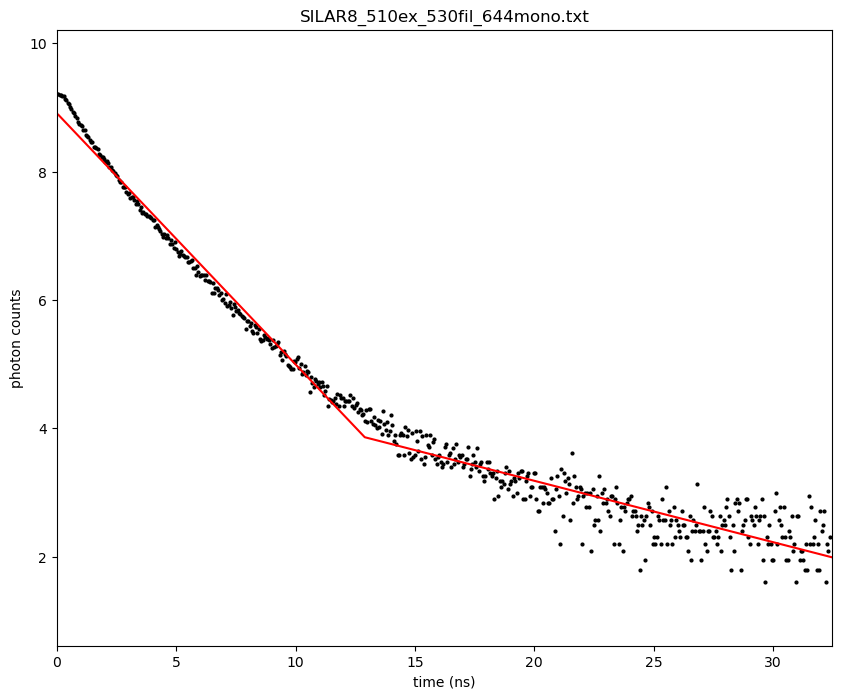

In [9]:
plot(fitx, fity, fileName)
plt.plot(x, twolines(x, *pw), 'red')
plt.xlim(0,max(fitx)+0.1)
plt.ylim(min(fity)-1, max(fity)+1)

In [10]:
#Finding Reduced Chi-Squared Value to track goodness of fit - will implement in further update.

### finding carrier lifetime

the lifetime is related to the slope by $\tau=-\frac{1}{k}$

In [11]:
tau1 = -1/m1
print(f'The first lifetime of the material is {tau1:.4f} ns.')

tau2 = -1/m2
print(f'The second lifetime of the material is {tau2:.4f} ns.')

The first lifetime of the material is 2.5542 ns.
The second lifetime of the material is 10.4605 ns.
